In [23]:
log_path_proba = 'two_clusters_proba_ponderation/2025-10-01'
log_path_mh = 'two_clusters_MH/2025-10-01/'

In [2]:
import numpy as np
import re
import os
from omegaconf import OmegaConf

In [3]:
def get_metrics(data):
    train_pattern = re.compile(r"Train, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)(, gradient_norm=([\d\.]+))?")
    # Regex to extract test metrics
    test_pattern = re.compile(r"Test, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)")
    rounds, train_losses, train_accuracies, grads = [], [], [], []
    test_rounds, test_losses, test_accuracies = [], [], []

    for match in train_pattern.finditer(data):
        rounds.append(int(match.group(1)))
        train_losses.append(float(match.group(2)))
        train_accuracies.append(float(match.group(3)))
        if match.group(4):
            grads.append(float(match.group(5)))


    # Parse test logs
    for match in test_pattern.finditer(data):
        test_rounds.append(int(match.group(1)))
        test_losses.append(float(match.group(2)))
        test_accuracies.append(float(match.group(3)))
        
    return train_losses, train_accuracies, test_losses, test_accuracies, grads

In [24]:
res_proba = {}
for log_dir in os.listdir(log_path_proba):
    log_file  = f'{log_path_proba}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res_proba[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]
    
res_mh = {}
for log_dir in os.listdir(log_path_mh):
    log_file  = f'{log_path_mh}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res_mh[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]

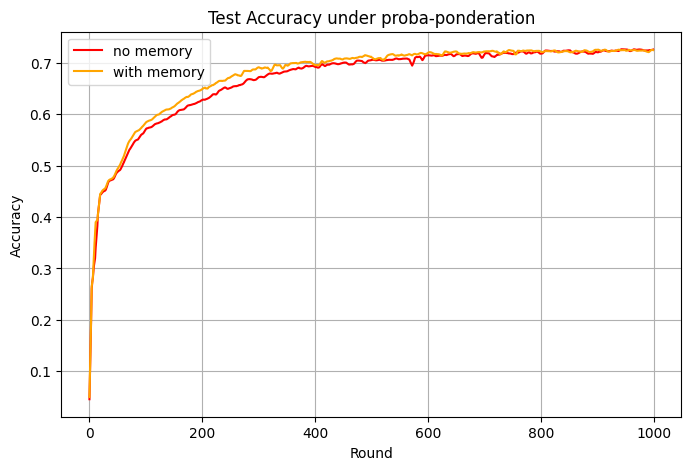

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
comparaison_proba = ['10-06-36', '10-45-40']
comparaison_mh = ['10-06-36', '10-45-40']
epochs = np.arange(len(res[comparaison[0]][0]))
plt.figure(figsize=(8, 5))
# plt.plot(epochs, np.convolve(np.array(res[comparaison[0]][4]), np.ones(10)/10)[:200], label="without gradients", color="red")
# plt.plot(epochs,  np.convolve(np.array(res[comparaison[1]][4]), np.ones(10)/10)[:200], label="with gradients", color="orange")
plt.plot(epochs, np.convolve(res[comparaison[0]][3], np.ones(5)/5)[:len(epochs)], color="red", label='no memory')
plt.plot(epochs, np.convolve(res[comparaison[1]][3], np.ones(5)/5)[:len(epochs)], color="orange", label='with memory')
# plt.plot(epochs, res[comparaison[2]][3], color="green", marker='x')
# plt.plot(epochs, res[comparaison[3]][3], color="green", marker='_')
# plt.plot(epochs, res[comparaison[4]][3], color="orange")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.title("Test Accuracy under proba-ponderation")
# pathological = mpatches.Patch(color="red", label="pathological")
# #iid = mpatches.Patch(color="orange", label="iid")
# dirichlet = mpatches.Patch(color="green", label="dirichlet")
plt.legend()
plt.grid(True)
plt.show()

## Fashion MNIST

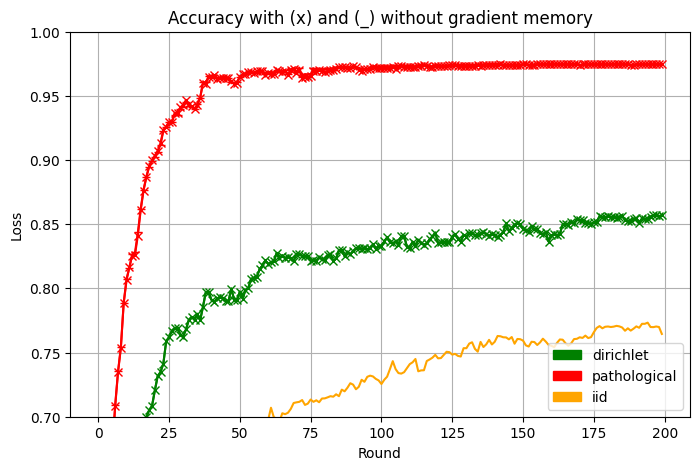

In [51]:
log_path = 'fashionmnist_report_01/2025-09-23'
import numpy as np
import re
import os
from omegaconf import OmegaConf
def get_metrics(data):
    train_pattern = re.compile(r"Train, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)(, gradient_norm=([\d\.]+))?")
    # Regex to extract test metrics
    test_pattern = re.compile(r"Test, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)")
    rounds, train_losses, train_accuracies, grads = [], [], [], []
    test_rounds, test_losses, test_accuracies = [], [], []

    for match in train_pattern.finditer(data):
        rounds.append(int(match.group(1)))
        train_losses.append(float(match.group(2)))
        train_accuracies.append(float(match.group(3)))
        if match.group(4):
            grads.append(float(match.group(5)))


    # Parse test logs
    for match in test_pattern.finditer(data):
        test_rounds.append(int(match.group(1)))
        test_losses.append(float(match.group(2)))
        test_accuracies.append(float(match.group(3)))
        
    return train_losses, train_accuracies, test_losses, test_accuracies, grads
res = {}
for log_dir in os.listdir(log_path):
    log_file  = f'{log_path}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
comparaison = ['17-11-02', '17-11-28', '17-15-40', '17-16-10', '17-26-21']
epochs = np.arange(len(res[comparaison[0]][0]))
plt.figure(figsize=(8, 5))
# plt.plot(epochs, np.convolve(np.array(res[comparaison[0]][4]), np.ones(10)/10)[:200], label="without gradients", color="red")
# plt.plot(epochs,  np.convolve(np.array(res[comparaison[1]][4]), np.ones(10)/10)[:200], label="with gradients", color="orange")
plt.plot(epochs, res[comparaison[0]][3], color="orange")
plt.plot(epochs[:143], res[comparaison[1]][3][:143], color="red", marker='_')
plt.plot(epochs, res[comparaison[2]][3], color="red", marker='x')
plt.plot(epochs, res[comparaison[3]][3], color="green", marker='')
plt.plot(epochs, res[list(res.keys())[4]][3], color="green", marker='x')
plt.ylim((0.7, 1))
plt.xlabel("Round")
plt.ylabel("Loss")
plt.title("Accuracy with (x) and (_) without gradient memory")
pathological = mpatches.Patch(color="red", label="pathological")
iid = mpatches.Patch(color="orange", label="iid")
dirichlet = mpatches.Patch(color="green", label="dirichlet")
plt.legend(handles=[dirichlet, pathological, iid])
plt.grid(True)
plt.show()

## CIFAR-10

In [ ]:
log_path = 'pathological_cifar10_full_evaluation/2025-09-18'
import numpy as np
import re
import os
from omegaconf import OmegaConf
def get_metrics(data):
    train_pattern = re.compile(r"Train, Round\s+(\d+): loss=([\d\.]+), accuracy=([\d\.]+)(, gradient_norm=([\d\.]+))?")
    # Regex to extract test metrics
    test_pattern = re.compile(r"Test, Round\s+(\d+): loss=([\d\.]+), accuracy=([\d\.]+)")
    rounds, train_losses, train_accuracies, grads = [], [], [], []
    test_rounds, test_losses, test_accuracies = [], [], []

    for match in train_pattern.finditer(data):
        rounds.append(int(match.group(1)))
        train_losses.append(float(match.group(2)))
        train_accuracies.append(float(match.group(3)))
        if match.group(4):
            grads.append(float(match.group(5)))


    # Parse test logs
    for match in test_pattern.finditer(data):
        test_rounds.append(int(match.group(1)))
        test_losses.append(float(match.group(2)))
        test_accuracies.append(float(match.group(3)))
        
    return train_losses, train_accuracies, test_losses, test_accuracies, grads

res = {}
for log_dir in os.listdir(log_path):
    log_file  = f'{log_path}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]
    
path_res = [res['14-59-56'][3],res['15-00-04'][3]] 

log_path = 'dirichlet_cifar10_full_evaluation/2025-09-19'
res = {}
for log_dir in os.listdir(log_path):
    log_file  = f'{log_path}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]
    
dir_res = [res['11-49-57'][3],res['11-50-16'][3]] 




In [31]:
def get_metrics(data):
    train_pattern = re.compile(r"Train, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)(, gradient_norm=([\d\.]+))?")
    # Regex to extract test metrics
    test_pattern = re.compile(r"Test, Round\s+(\d+): Loss=([\d\.]+), Accuracy=([\d\.]+)")
    rounds, train_losses, train_accuracies, grads = [], [], [], []
    test_rounds, test_losses, test_accuracies = [], [], []

    for match in train_pattern.finditer(data):
        rounds.append(int(match.group(1)))
        train_losses.append(float(match.group(2)))
        train_accuracies.append(float(match.group(3)))
        if match.group(4):
            grads.append(float(match.group(5)))


    # Parse test logs
    for match in test_pattern.finditer(data):
        test_rounds.append(int(match.group(1)))
        test_losses.append(float(match.group(2)))
        test_accuracies.append(float(match.group(3)))
        
    return train_losses, train_accuracies, test_losses, test_accuracies, grads

log_path = 'test_cifar10_righttrainloss/2025-09-22'
res = {}
for log_dir in os.listdir(log_path):
    log_file  = f'{log_path}/{log_dir}'
    with open(f'{log_file}/main.log', 'r') as f:
        data = f.read()
    config_file = OmegaConf.load(f'{log_file}/.hydra/config.yaml') 
    train_losses, train_accuracies, test_losses, test_accuracies, grads = get_metrics(data)
    res[log_dir.split('/')[-1]] = [train_losses, train_accuracies, test_losses, test_accuracies, grads]
    
dir_iid = res['16-36-39']

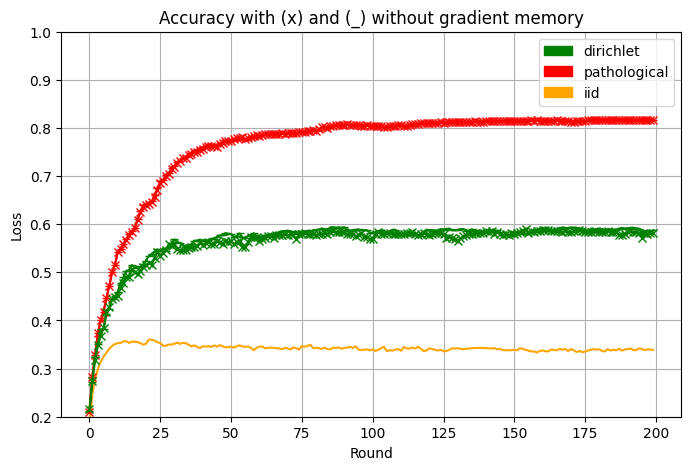

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
epochs = np.arange(len(path_res[0]))
plt.figure(figsize=(8, 5))

# plt.plot(epochs, np.convolve(np.array(res[comparaison[0]][4]), np.ones(10)/10)[:200], label="without gradients", color="red")
# plt.plot(epochs,  np.convolve(np.array(res[comparaison[1]][4]), np.ones(10)/10)[:200], label="with gradients", color="orange")#
plt.plot(epochs, dir_iid[3], color="orange")
plt.plot(epochs, path_res[0], color="red", marker='_')
plt.plot(epochs, path_res[1], color="red", marker='x')
plt.plot(epochs, dir_res[0],color="green", marker='_')
plt.plot(epochs, dir_res[1], color="green", marker='x')
plt.ylim((0.2, 1))
plt.xlabel("Round")
plt.ylabel("Loss")
plt.title("Accuracy with (x) and (_) without gradient memory")
pathological = mpatches.Patch(color="red", label="pathological")
iid = mpatches.Patch(color="orange", label="iid")
dirichlet = mpatches.Patch(color="green", label="dirichlet")
plt.legend(handles=[dirichlet, pathological, iid])
plt.grid(True)
plt.show()